# Underfitting & Overfitting

When we think about any statistical model

### Underfitting (model that is too simple for the data):
* When the model isn't fitting to a trend in the data
* data points too far away from the model fit
* the model MISSES a true relationship in the data
* doesn't capture that actual trend
* too much of a generalization, not specific enough to the data


### Overfitting (model that is too complex for the data):
* too specific to the data the MODEL IS FIT ON
* considering the data it is given TOO MUCH
* too easily biased by outliers
* will SEEM to fit very very well on the data it is trained, but will FAIL to generalize on test data

## Training vs. testing

**training:** data the model sees, data we fit to

**testing:** NEW data not used to fit the model (held out data, independent data)

We NEED test data to examine how the model GENERALIZES 

# Import libraries

In [1]:
import pandas as pd
import numpy as np

# sklearn is for modeling/regression/machine learning
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# plotting library for today
import matplotlib.pyplot as plt

# make plots show up nicely right in the jupyter notebook
%matplotlib inline

In [2]:
#!pip install sklearn

# Paul made these data himself

There IS a true relationship between x and y -- Paul knows what it is

We simulate the data, so we KNOW the correct answer
* That way, we can know if a model is doing a good job


In [3]:
df = pd.read_csv('sample_data.csv')

In [4]:
#df.y[3] = -400

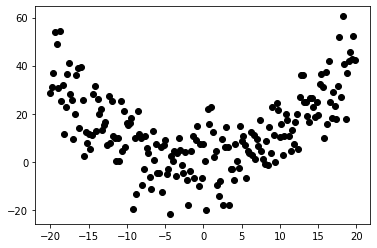

In [5]:
plt.scatter(df.x, df.y, color = 'black')

# Fit a linear regression model in sklearn and generate predictions

Fit a straight line through the data -- find the best linear relationship

In [6]:
# in python, we specify *predictors* and *outcomes* separately

# we usually call the predictor X (this is a matrix)
X = df.drop(columns = 'y')

# we usually call the outcome y
y = df.y

In [7]:
# set up a 'linear regression object'
reg1 = linear_model.LinearRegression()

# now FIT the linear regression model
model1 = reg1.fit(X, y)

# generate predictions for every x-value from the regression model
model1_preds = reg1.predict(X)

In [8]:
model1_preds

array([10.42971047, 10.46011292, 10.49051537, 10.52091782, 10.55132027,
       10.58172272, 10.61212517, 10.64252762, 10.67293007, 10.70333252,
       10.73373498, 10.76413743, 10.79453988, 10.82494233, 10.85534478,
       10.88574723, 10.91614968, 10.94655213, 10.97695458, 11.00735703,
       11.03775948, 11.06816193, 11.09856438, 11.12896683, 11.15936928,
       11.18977173, 11.22017418, 11.25057663, 11.28097909, 11.31138154,
       11.34178399, 11.37218644, 11.40258889, 11.43299134, 11.46339379,
       11.49379624, 11.52419869, 11.55460114, 11.58500359, 11.61540604,
       11.64580849, 11.67621094, 11.70661339, 11.73701584, 11.76741829,
       11.79782075, 11.8282232 , 11.85862565, 11.8890281 , 11.91943055,
       11.949833  , 11.98023545, 12.0106379 , 12.04104035, 12.0714428 ,
       12.10184525, 12.1322477 , 12.16265015, 12.1930526 , 12.22345505,
       12.2538575 , 12.28425995, 12.3146624 , 12.34506486, 12.37546731,
       12.40586976, 12.43627221, 12.46667466, 12.49707711, 12.52

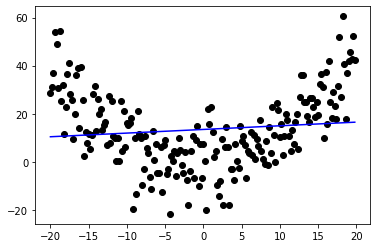

In [9]:
plt.scatter(df.x, df.y, color = 'black')
plt.plot(df.x, model1_preds, color = 'blue')

# R2 score

How well is the model predicting the y-values?

R2 goes from 0 (not predicting anything of use) -- 1 (perfectly predicting  the data)

In [10]:
r2_score(df.y, model1_preds)

0.012288780577046188

# Let's make a model that is quadratic

a term for x^2

In [11]:
poly = PolynomialFeatures(2)
X_2 = poly.fit_transform(X)

In [12]:
X_2

array([[ 1.00000000e+00, -2.00000000e+01,  4.00000000e+02],
       [ 1.00000000e+00, -1.98000000e+01,  3.92040000e+02],
       [ 1.00000000e+00, -1.96000000e+01,  3.84160000e+02],
       [ 1.00000000e+00, -1.94000000e+01,  3.76360000e+02],
       [ 1.00000000e+00, -1.92000000e+01,  3.68640000e+02],
       [ 1.00000000e+00, -1.90000000e+01,  3.61000000e+02],
       [ 1.00000000e+00, -1.88000000e+01,  3.53440000e+02],
       [ 1.00000000e+00, -1.86000000e+01,  3.45960000e+02],
       [ 1.00000000e+00, -1.84000000e+01,  3.38560000e+02],
       [ 1.00000000e+00, -1.82000000e+01,  3.31240000e+02],
       [ 1.00000000e+00, -1.80000000e+01,  3.24000000e+02],
       [ 1.00000000e+00, -1.78000000e+01,  3.16840000e+02],
       [ 1.00000000e+00, -1.76000000e+01,  3.09760000e+02],
       [ 1.00000000e+00, -1.74000000e+01,  3.02760000e+02],
       [ 1.00000000e+00, -1.72000000e+01,  2.95840000e+02],
       [ 1.00000000e+00, -1.70000000e+01,  2.89000000e+02],
       [ 1.00000000e+00, -1.68000000e+01

In [13]:
# set up a 'linear regression object'
reg2 = linear_model.LinearRegression()

# now FIT the linear regression model
model2 = reg2.fit(X_2, y)

# generate predictions for every x-value from the regression model
model2_preds = reg2.predict(X_2)

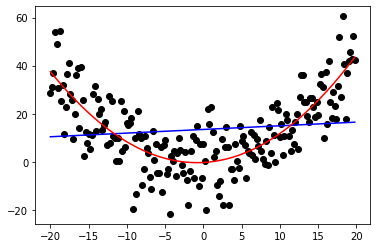

In [14]:
plt.scatter(df.x, df.y, color = 'black')
plt.plot(df.x, model1_preds, color = 'blue')
plt.plot(df.x, model2_preds, color = 'red')

In [15]:
r2_score(df.y, model2_preds)

0.6140052651128557

# MORE polynomial terms

In [16]:
poly = PolynomialFeatures(50)
X_big = poly.fit_transform(X)
# set up a 'linear regression object'
reg_big = linear_model.LinearRegression()

# now FIT the linear regression model
model_big = reg_big.fit(X_big, y)

# generate predictions for every x-value from the regression model
model_big_preds = reg_big.predict(X_big)

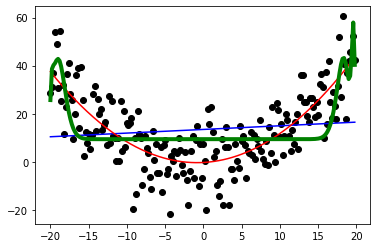

In [17]:
plt.scatter(df.x, df.y, color = 'black')
plt.plot(df.x, model1_preds, color = 'blue')
plt.plot(df.x, model2_preds, color = 'red')
plt.plot(df.x, model_big_preds, color = 'green', linewidth = 4)

In [18]:
r2_score(df.y, model_big_preds)

0.38064284019779204

In [ ]:
df['y'] = np.random.normal(df.x*.2+ .1*(df.x)**2, scale = 10)